<a href="https://colab.research.google.com/github/RostekA/data-science/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# metrics
from sklearn.metrics import confusion_matrix

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

tf.__version__

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'2.2.0'

## Dataset MNIST

In [0]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

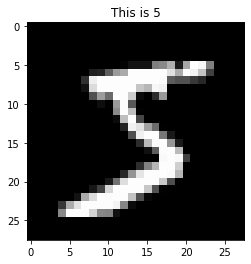

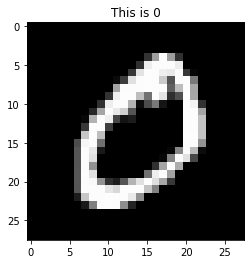

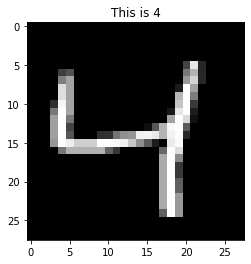

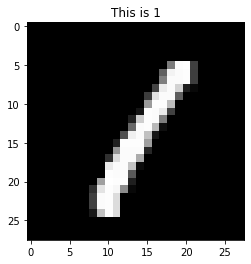

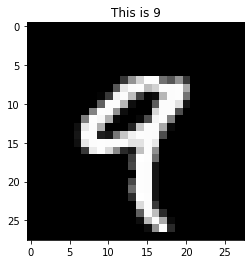

In [4]:
for i in range(5):
  plt.imshow(X_train[i], cmap='gray')
  plt.title(f'This is {y_train[i]}')
  plt.show()

### Normalizing data

In [0]:
X_train, X_test = X_train / 255.0, X_test/255.0

## Neural Network

In [6]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2)) # to reduce overfitting
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2927 - accuracy: 0.9155 - val_loss: 0.1406 - val_accuracy: 0.9571
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1422 - accuracy: 0.9580 - val_loss: 0.0953 - val_accuracy: 0.9703
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1057 - accuracy: 0.9679 - val_loss: 0.0905 - val_accuracy: 0.9723
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0876 - accuracy: 0.9723 - val_loss: 0.0780 - val_accuracy: 0.9766
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0737 - accuracy: 0.9769 - val_loss: 0.0728 - val_accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0643 - accuracy: 0.9804 - val_loss: 0.0743 - val_accuracy: 0.9762
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0574 - accuracy: 0.9811 - val_loss: 0.0716 - val_accuracy:

In [7]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0727 - accuracy: 0.9786


[0.07269343733787537, 0.978600025177002]

In [8]:
r.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Learning Curves

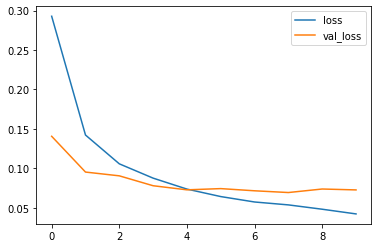

In [9]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

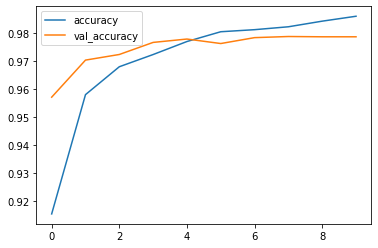

In [10]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [11]:
preds = model.predict(X_test)
predictions = preds.argmax(axis=1)
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [12]:
conf_matrix = confusion_matrix(predictions, y_test)
conf_matrix

array([[ 973,    0,    6,    1,    0,    2,    8,    3,    7,    3],
       [   0, 1122,    0,    0,    0,    0,    2,    2,    0,    2],
       [   0,    2, 1010,    5,    4,    0,    3,    7,    3,    0],
       [   1,    2,    3,  993,    1,   17,    1,    5,    5,    4],
       [   0,    0,    1,    0,  963,    1,    2,    1,    1,   10],
       [   0,    1,    0,    4,    0,  863,    3,    0,    6,    4],
       [   2,    2,    2,    0,    2,    3,  936,    0,    2,    1],
       [   1,    0,    5,    3,    1,    1,    0, 1003,    4,    2],
       [   3,    6,    4,    3,    2,    4,    3,    2,  942,    2],
       [   0,    0,    1,    1,    9,    1,    0,    5,    4,  981]])

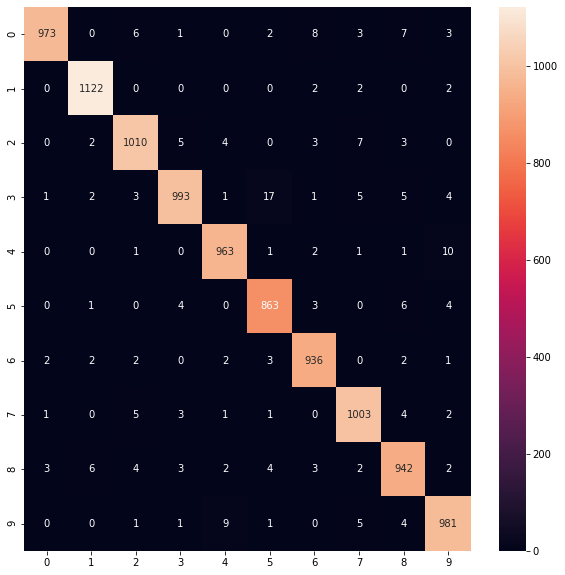

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

## Misclassified cases

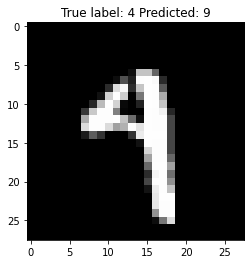

In [14]:
misclassified_idx = np.where(predictions != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], predictions[i]))
plt.show()